#**Analysis of Churn Customer**

##Introduction

Interconnect is telecomunication company that focus on landline and internet service. Aside from those two services, it also offers other service such as Internet Security, Tech Support, Cloud Storage, Online Backup and Streaming Service.

In order to maintain the business stays profitable, the company decided to deepen analize their customers by forecast their churn rate. Any potential churn client will be offer promotion code and special package to keep them using the service.

The marketing team has been gathered the data needed to run the analysis such as client information, contract and current service.

##Goal

The goals of this project are as below:
1. Having a proper machine learning model to predict client churn with AUC-ROC as main metric with score exceeding or equal to 0.88.
2. Having F1 score as additional metric.
3. Having statistic calculation and visualization the findings.
4. Having comparation behaviour of telephone and internet users.

##Steps

The steps of this project are as below:
1. Load the data and study the general information.
2. Prepare the data if anomalies were found & check the class balance.
3. Create machine learning model & train the model while maintain AUC-ROC score above or equal to 0.88.
4. Draw the conclusion.




####Data Loadment

In [ ]:
pip install xgboost

In [ ]:
pip install catboost

In [ ]:
# Data Manipulation and Analysis Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import xgboost as xgb
from scipy.stats import uniform, randint
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.svm import SVC


In [ ]:
#Loading Dataset
path_contract = '/content/contract.csv'
path_personal = '/content/personal.csv'
path_internet = '/content/internet.csv'
path_phone = '/content/phone.csv'

data_contract = pd.read_csv(path_contract)
data_personal = pd.read_csv(path_personal)
data_internet = pd.read_csv(path_internet)
data_phone = pd.read_csv(path_phone)

#####Data Contract

Understand and checking the general information of the data and looking for anomalies of data contract.

In [ ]:
data_contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [ ]:
data_contract.shape

(7043, 8)

In [ ]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
data_contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
data_contract.duplicated().sum()

0

Based on data exploratory in the first chapter, we don't need to change the date format in begin_date and end_date, but we have to convert the value in total_charges into float64 format.



In [ ]:
data_contract.columns = ['customer_id',
                         'begin_date',
                         'end_date', 'type',
                         'paperless_billing',
                         'payment_method',
                         'monthly_charges',
                         'total_charges']

In [ ]:
data_contract['total_charges'] = pd.to_numeric(data_contract['total_charges'], errors='coerce').astype('float64')

In [ ]:
data_contract.head(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50


In [ ]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


#####Data Personal

Understand and checking the general information of the data and looking for anomalies of data personal.

In [ ]:
data_personal.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [ ]:
data_personal.shape

(7043, 5)

In [ ]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
data_personal['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
data_personal.duplicated().sum()

0

In [ ]:
data_personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Based on data exploratory in the first chapter, the data is already good and we just need to set the column name into proper style.

In [ ]:
data_personal.columns = ['customer_id',
                         'gender',
                         'senior_citizen',
                         'partner',
                         'dependents']

In [ ]:
data_personal.head(2)

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


#####Data Internet

Understand and checking the general information of the data and looking for anomalies of data internet.

In [ ]:
data_internet.head(2)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No


In [ ]:
data_internet.shape

(5517, 8)

In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
data_internet.duplicated().sum()

0

In [ ]:
data_internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Based on data exploratory in the first chapter, the data is already good and we just need to set the column name into proper style.

In [ ]:
data_internet.columns = ['customer_id',
                         'internet_service',
                         'online_security',
                         'online_backup',
                         'device_protection',
                         'tech_support',
                         'streaming_tv',
                         'streaming_movies']

In [ ]:
data_internet.head(2)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No


#####Data Phone

Understand and checking the general information of the data and looking for anomalies of data personal.

In [ ]:
data_phone.head(3)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


In [ ]:
data_phone.shape

(6361, 2)

In [ ]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
data_phone.duplicated().sum()

0

In [ ]:
data_phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

Based on data exploratory in the first chapter, the data is already good and we just need to set the column name into proper style.

In [ ]:
data_phone.columns = ['customer_id', 'multiple_lines']

In [ ]:
data_phone.head(2)

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No


####Feature Engineering

In this stage we will shape the data given into one single dataset that fit for machine learning. Those step are as below:
1. Merge all data into one dataset.
2. Drop unecessary column(s).
3. One hot encoding to turns categorical data into boolean.
4. Split the data into feature and target.
5. Split the data into train set and test set.

#####Data Merging

In [ ]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


In [ ]:
data = pd.merge(data_contract, data_internet, on='customer_id', how='left')

In [ ]:
#Merged data of data_contract and data_internet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
 8   internet_service   5517 non-null   object 
 9   online_security    5517 non-null   object 
 10  online_backup      5517 non-null   object 
 11  device_protection  5517 non-null   object 
 12  tech_support       5517 non-null   object 
 13  streaming_tv       5517 non-null   object 
 14  streaming_movies   5517 non-null   object 
dtypes: float64(2), object(13)
memory usage: 825.5+ KB


In [ ]:
data = pd.merge(data, data_personal, on='customer_id', how='left')

In [ ]:
#Merged data of data_contract, data_internet and data_personal
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
 8   internet_service   5517 non-null   object 
 9   online_security    5517 non-null   object 
 10  online_backup      5517 non-null   object 
 11  device_protection  5517 non-null   object 
 12  tech_support       5517 non-null   object 
 13  streaming_tv       5517 non-null   object 
 14  streaming_movies   5517 non-null   object 
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

In [ ]:
data = pd.merge(data, data_phone, on='customer_id', how='left')

In [ ]:
#Merged data of data_contract, data_personal, data_internet and data_phone
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
 8   internet_service   5517 non-null   object 
 9   online_security    5517 non-null   object 
 10  online_backup      5517 non-null   object 
 11  device_protection  5517 non-null   object 
 12  tech_support       5517 non-null   object 
 13  streaming_tv       5517 non-null   object 
 14  streaming_movies   5517 non-null   object 
 15  gender             7043 non-null   object 
 16  senior_citizen     7043 

In [ ]:
data.isnull().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
dtype: int64

In [ ]:
data = data.dropna(subset=['total_charges'])

In [ ]:
data.isnull().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service     1520
online_security      1520
online_backup        1520
device_protection    1520
tech_support         1520
streaming_tv         1520
streaming_movies     1520
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        680
dtype: int64

In [ ]:
data.head(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No


Filling the null values with "No" because these customers are not using any of the services mentioned above.

In [ ]:
data = data.fillna('No')
data.isnull().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
dtype: int64

Creating column churn in order to indicate churn customer where value 0 means active customer and value 1 means churn customer

In [ ]:
data['churn'] = data['end_date'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
data.shape

(7032, 21)

In [ ]:
data['churn'].unique()

array([0, 1])

In [ ]:
data.head(2)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   begin_date         7032 non-null   object 
 2   end_date           7032 non-null   object 
 3   type               7032 non-null   object 
 4   paperless_billing  7032 non-null   object 
 5   payment_method     7032 non-null   object 
 6   monthly_charges    7032 non-null   float64
 7   total_charges      7032 non-null   float64
 8   internet_service   7032 non-null   object 
 9   online_security    7032 non-null   object 
 10  online_backup      7032 non-null   object 
 11  device_protection  7032 non-null   object 
 12  tech_support       7032 non-null   object 
 13  streaming_tv       7032 non-null   object 
 14  streaming_movies   7032 non-null   object 
 15  gender             7032 non-null   object 
 16  senior_citizen     7032 non-n

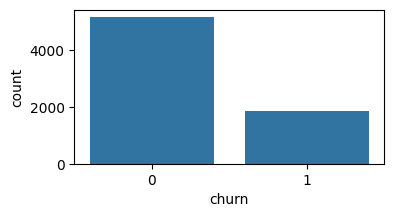

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(x='churn', data=data)
plt.show()

#####Data Dropping

In [ ]:
#Droping unecessary columns
data = data.drop(['customer_id', 'begin_date', 'end_date'], axis=1)
data.head(2)

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No,0
1,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,0


#####One Hot Encoding

In [ ]:
scaler = MinMaxScaler()
data[['total_charges', 'monthly_charges']] = scaler.fit_transform(data[['total_charges', 'monthly_charges']])

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

In [ ]:
data.head(2)

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
0,0.0,1.0,2.0,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0
1,1.0,0.0,3.0,0.385075,0.215867,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0


In [ ]:
data.duplicated().sum()

22

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7010 non-null   float64
 1   paperless_billing  7010 non-null   float64
 2   payment_method     7010 non-null   float64
 3   monthly_charges    7010 non-null   float64
 4   total_charges      7010 non-null   float64
 5   internet_service   7010 non-null   float64
 6   online_security    7010 non-null   float64
 7   online_backup      7010 non-null   float64
 8   device_protection  7010 non-null   float64
 9   tech_support       7010 non-null   float64
 10  streaming_tv       7010 non-null   float64
 11  streaming_movies   7010 non-null   float64
 12  gender             7010 non-null   float64
 13  senior_citizen     7010 non-null   int64  
 14  partner            7010 non-null   float64
 15  dependents         7010 non-null   float64
 16  multiple_lines     7010 non-n

#####Determining Feature and Target

In [ ]:
#X where its features data
#y where its target data

X = data.drop(['churn'], axis=1)
y = data['churn']

In [ ]:
X.head(2)

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines
0,0.0,1.0,2.0,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
1,1.0,0.0,3.0,0.385075,0.215867,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7010 non-null   float64
 1   paperless_billing  7010 non-null   float64
 2   payment_method     7010 non-null   float64
 3   monthly_charges    7010 non-null   float64
 4   total_charges      7010 non-null   float64
 5   internet_service   7010 non-null   float64
 6   online_security    7010 non-null   float64
 7   online_backup      7010 non-null   float64
 8   device_protection  7010 non-null   float64
 9   tech_support       7010 non-null   float64
 10  streaming_tv       7010 non-null   float64
 11  streaming_movies   7010 non-null   float64
 12  gender             7010 non-null   float64
 13  senior_citizen     7010 non-null   int64  
 14  partner            7010 non-null   float64
 15  dependents         7010 non-null   float64
 16  multiple_lines     7010 non-n

In [ ]:
y.head(2)

0    0
1    0
Name: churn, dtype: int64

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7010 entries, 0 to 7042
Series name: churn
Non-Null Count  Dtype
--------------  -----
7010 non-null   int64
dtypes: int64(1)
memory usage: 109.5 KB


#####Splitting Train and Test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(6309, 17)

In [ ]:
X_test.shape

(701, 17)

In [ ]:
y_train.shape

(6309,)

In [ ]:
y_test.shape

(701,)

####Developping Machine Learning Model

In [ ]:
def class_eval(model, X_train, X_test, y_train, y_test):
    # Machine Learning Model
    ml_model = model.__class__.__name__

    # Predict Train
    y_train_pred = model.predict(X_train)

    # Predict Test
    y_test_pred = model.predict(X_test)

    # Predict Probabilities for ROC AUC score
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC AUC score
    roc_auc_train = round(roc_auc_score(y_train, y_train_pred_proba) * 100, 2)
    roc_auc_test = round(roc_auc_score(y_test, y_test_pred_proba) * 100, 2)

    # Precision
    precision_train = round(precision_score(y_train, y_train_pred) * 100, 2)
    precision_test = round(precision_score(y_test, y_test_pred) * 100, 2)

    # F1 Score
    f1_score_train = round(f1_score(y_train, y_train_pred) * 100, 2)
    f1_score_test = round(f1_score(y_test, y_test_pred) * 100, 2)

    # Create DataFrame for results
    ml_result = pd.DataFrame({
        'model': [ml_model],
        'roc_auc_train': [roc_auc_train],
        'roc_auc_test': [roc_auc_test],
        'precision_train': [precision_train],
        'precision_test': [precision_test],
        'f1_score_train': [f1_score_train],
        'f1_score_test': [f1_score_test]
    })

    return ml_result


#####Logistic Regression

Performing hyperparameter tuning for a Logistic Regression model using GridSearchCV to find the best parameters based on the ROC AUC score.

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 3, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000],
    'random_state': [12, 42, 12345]
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=123)

# Initialize GridSearchCV with the Logistic Regression model and the parameter grid
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_lr = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'C': 3, 'max_iter': 100, 'random_state': 12, 'solver': 'liblinear'}


In [ ]:
lr_model = class_eval(best_lr, X_train, X_test, y_train, y_test)
lr_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,LogisticRegression,83.34,83.95,64.46,63.91,57.29,58.42


#####Random Forest Classifier

Performing hyperparameter tuning for a Random Forest Classifier model using GridSearchCV to find the best parameters based on the ROC AUC score

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 11, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the RandomForestClassifier model and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rf_model = class_eval(best_rf, X_train, X_test, y_train, y_test)
rf_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,RandomForestClassifier,85.54,85.12,71.23,69.39,53.74,53.12


#####Decision Tree Classifier

Performing hyperparameter tuning for a Decision Tree Classifier model using GridSearchCV to find the best parameters based on the ROC AUC score

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the DecisionTreeClassifier model and the parameter grid
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_dt = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
dt_model = class_eval(best_dt, X_train, X_test, y_train, y_test)
dt_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,DecisionTreeClassifier,84.35,85.02,63.5,60.15,55.14,54.98


#####X Gradient Boost Classifier

Performing hyperparameter tuning for a X Gradient Boost Classifier model using GridSearchCV to find the best parameters based on the ROC AUC score

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XG Boost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Initialize GridSearchCV with the XGBoost model and the parameter grid
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_xgb = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.6}


In [ ]:
xgb_model = class_eval(best_xgb, X_train, X_test, y_train, y_test)
xgb_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,XGBClassifier,86.36,85.53,70.35,66.96,59.59,55.56


#####Light Gradient Boosting Classifier

Performing hyperparameter tuning for a Light Gradient Boost Classifier model using GridSearchCV to find the best parameters based on the ROC AUC score

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_lgb = {
    'num_leaves': [31, 41, 51],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Initialize GridSearchCV with the LightGBM model and the parameter grid
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search_lgb.fit(X_train, y_train)

# Get the best model from the grid search
best_lgb = grid_search_lgb.best_estimator_

# Print the best parameters
print(f"Best parameters found for LightGBM: {grid_search_lgb.best_params_}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[LightGBM] [Info] Number of positive: 1699, number of negative: 4610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 6309, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269298 -> initscore=-0.998188
[LightGBM] [Info] Start training from score -0.998188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters found for LightGBM: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.6}


In [ ]:
lgb_model = class_eval(best_lgb, X_train, X_test, y_train, y_test)
lgb_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,LGBMClassifier,86.01,85.5,69.17,66.1,60.07,56.52


#####Cat Boost Classifier

Performing hyperparameter tuning for a Cat Gradient Boost Classifier model using GridSearchCV to find the best parameters based on the ROC AUC score

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_cat = {
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.8, 1, 1.2]
}

# Define the CatBoost model
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Initialize GridSearchCV with the CatBoost model and the parameter grid
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search_cat.fit(X_train, y_train)

# Get the best model from the grid search
best_cat = grid_search_cat.best_estimator_

# Print the best parameters
print(f"Best parameters found for CatBoost: {grid_search_cat.best_params_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found for CatBoost: {'bagging_temperature': 0.8, 'depth': 3, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.05}


In [ ]:
cat_model = class_eval(best_cat, X_train, X_test, y_train, y_test)
cat_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,CatBoostClassifier,85.85,85.85,69.63,64.52,61.33,56.74


#####Gradient Boosting Classifier

Performing hyperparameter tuning for a Gradient Boost Classifier model using GridSearchCV to find the best parameters based on the ROC AUC score

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with the Gradient Boosting model and the parameter grid
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_gbm = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.6}


In [ ]:
gbm_model = class_eval(best_gbm, X_train, X_test, y_train, y_test)
gbm_model

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
0,GradientBoostingClassifier,86.98,85.88,71.52,66.39,60.63,57.04


####Result

In [ ]:
result_all = pd.concat([lr_model, rf_model, dt_model, xgb_model, lgb_model, cat_model, gbm_model], ignore_index=True)
result_all = result_all.sort_values(by='roc_auc_test', ascending=False)
result_all

,model,roc_auc_train,roc_auc_test,precision_train,precision_test,f1_score_train,f1_score_test
6,GradientBoostingClassifier,86.98,85.88,71.52,66.39,60.63,57.04
5,CatBoostClassifier,85.85,85.85,69.63,64.52,61.33,56.74
3,XGBClassifier,86.36,85.53,70.35,66.96,59.59,55.56
4,LGBMClassifier,86.01,85.50,69.17,66.10,60.07,56.52
1,RandomForestClassifier,85.54,85.12,71.23,69.39,53.74,53.12
2,DecisionTreeClassifier,84.35,85.02,63.50,60.15,55.14,54.98
0,LogisticRegression,83.34,83.95,64.46,63.91,57.29,58.42


####Summary


The performance of various machine learning models for predicting customer churn was evaluated based on ROC AUC, precision, and F1 scores. **The Gradient Boosting Classifier** emerged as the top performer with an ROC AUC of **85.88%** and an F1 score of **57.04%** on the test set. The CatBoost Classifier followed closely with an ROC AUC of 85.85% and an F1 score of 56.74%.

The Gradient Boosting Classifier achieved a strong ROC AUC score of 85.88%, indicating good discrimination between churn and non-churn customers. However, its F1 score of 57.04% suggests that while it performs well overall, its balance between precision and recall needs improvement. This performance is particularly notable given the **imbalanced dataset**, where only 1 in 4 customers are churners.